# Notebook to analyse individual xenopus scRNA-seq datasets

## Imports

In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import scvelo as scv
from scipy import stats
import os
import matplotlib
import pickle
%matplotlib inline

import random
np.random.seed(0)
random.seed(0)

## Settings

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sc.settings.verbosity = 0  # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()


In [4]:
#scv.logging.print_versions()

## Loading individual datasets

In [5]:
def save_intermediate_files(datasets, temp_dir, file_name_template, identifier):
    for d in datasets:
        file = os.path.join('.', temp_dir, file_name_template + '_' + d.obs[identifier][0] + '.h5ad')
        d.write(file, compression='gzip')
        
identifiers = ['st08','st10.5','st12','st13','st16','st18','st20','st22','st24','st27']
      
def load_intermediate_files(temp_dir, file_name_template, identifiers):
    ob_list = []
    for i in identifiers:
        file = os.path.join('.', temp_dir, file_name_template + '_' + i+ '.h5ad')
        ob_list.append(sc.read_h5ad(file))
    return ob_list

In [6]:
#save_intermediate_files(datasets_z, 'intermediate_files', 'zUMI_Unprocessed' , 'stage')

In [7]:
import sys
sys.path.append('/work/Xenopus/Notebooks/V3/Integrated_analysis/')
from Integrate import concat_for_harmony, adata_to_df

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [8]:
#loading and concatenating files
stages = ['st08', 'st10.5', 'st12', 'st13', 'st16', 'st18', 'st20', 'st22', 'st24', 'st27']
adatas = load_intermediate_files( '/work/Xenopus/Notebooks/V3/intermediate_files', 'zUMI_raw_singlets' , stages)

counts = concat_for_harmony(adatas, stages)


st08
st10.5
st12
st13
st16
st18
st20
st22
st24
st27
Concatenating data..


In [9]:
#Cell type colors from integrated annotation
colors = [
[(0.3388235294117647, 0.7117262591311034, 0.40584390618992694),0, 2],
[(0.7371472510572856, 0.895517108804306, 0.7108342945021145),1, 4],
[(0.5573241061130334, 0.8164244521337947, 0.546958861976163),2, 3],
[(0.7364705882352941, 0.08, 0.10117647058823528),3, 9],
[(0.7777777777777778, 0.7777777777777778, 0.7777777777777778),4, 1],
[(0.8828143021914648, 0.9546943483275664, 0.8621914648212226),5, 5],
[(0.9466666666666667, 0.26823529411764707, 0.19607843137254902),6, 8],
[(0.586082276047674, 0.586082276047674, 0.586082276047674),7, 0],
[(0.996078431372549, 0.8091503267973856, 0.39607843137254906),8, 14],
[(0.7752402921953095, 0.8583006535947711, 0.9368242983467897),9, 10],
[(0.41708573625528644, 0.6806305267204922, 0.8382314494425221),10, 11],
[(0.5513264129181085, 0.537916186082276, 0.7524490580545944),11, 13],
[(0.9874509803921568, 0.5411764705882353, 0.41568627450980394),12, 7],
[(0.1271049596309112, 0.4401845444059977, 0.7074971164936563),13, 12],
[(0.9913725490196079, 0.7913725490196079, 0.7082352941176471),14, 6]]
colors = pd.DataFrame(colors, columns = ['color', 'org_clust', 'clust_order'])

In [10]:
%matplotlib inline

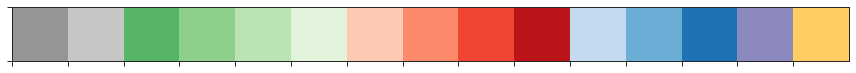

In [11]:


sns.palplot(colors.sort_values('clust_order').color)

## Plotting marker genes

In [12]:
from IndividualAnalysis import plot_ind_cell_clusters, plot_gene_expression, plot_gene_expression_umap

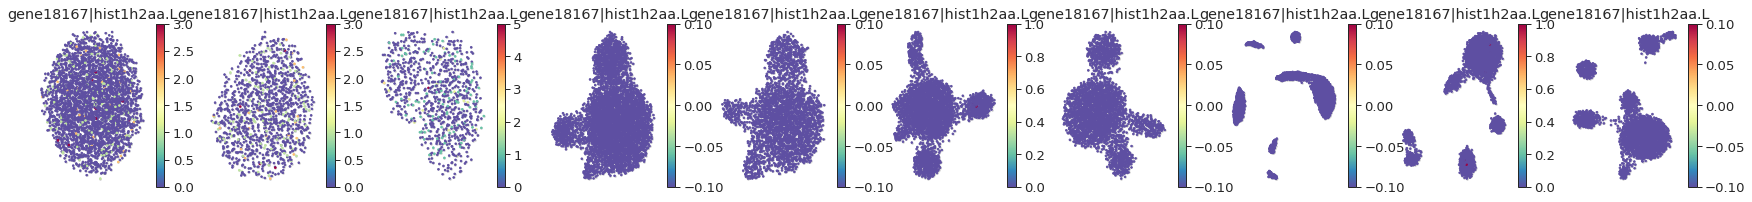

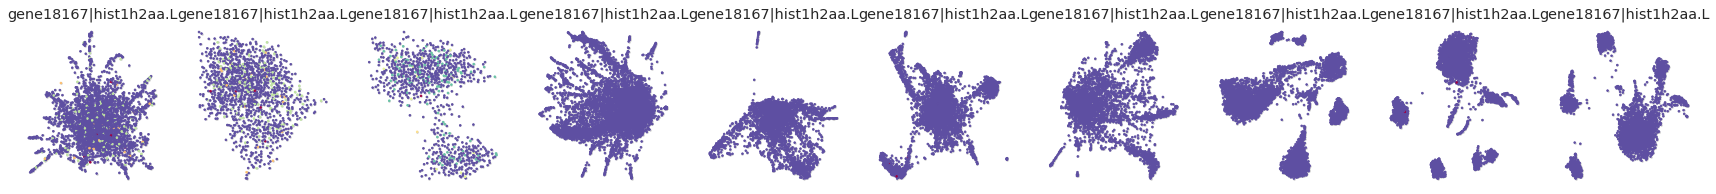

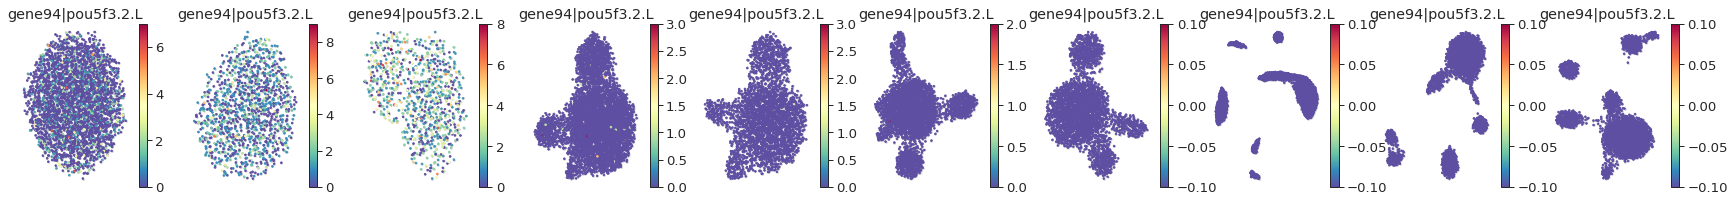

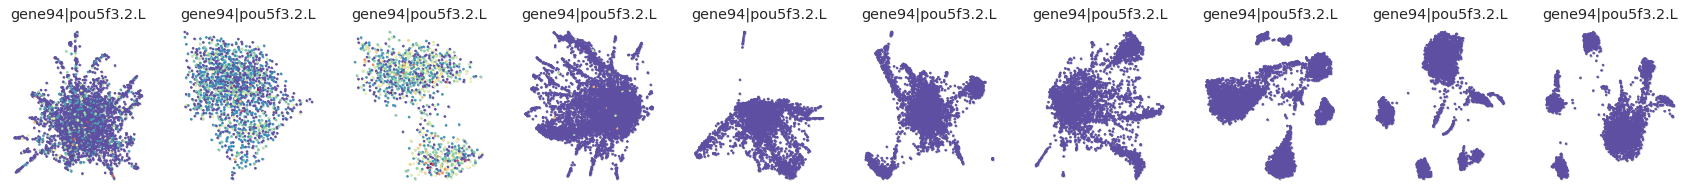

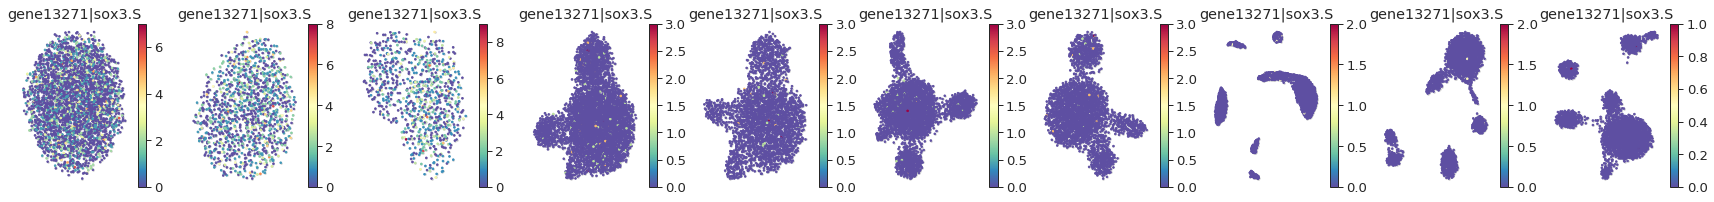

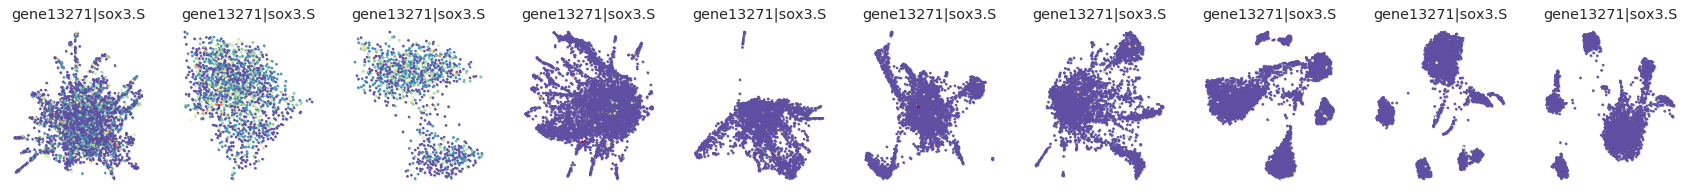

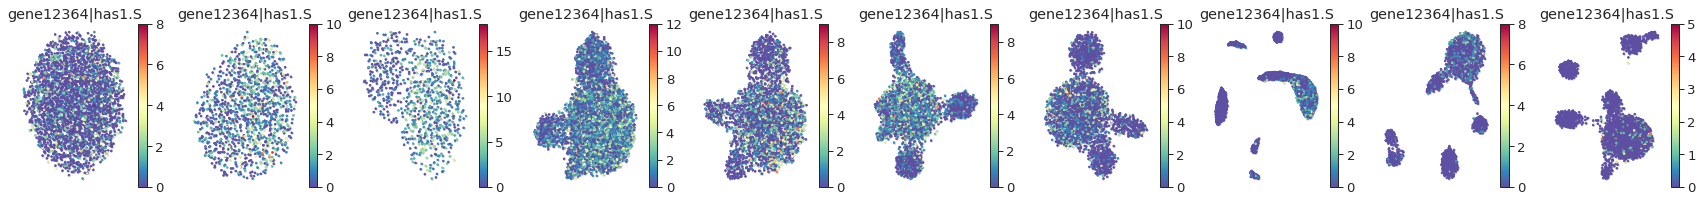

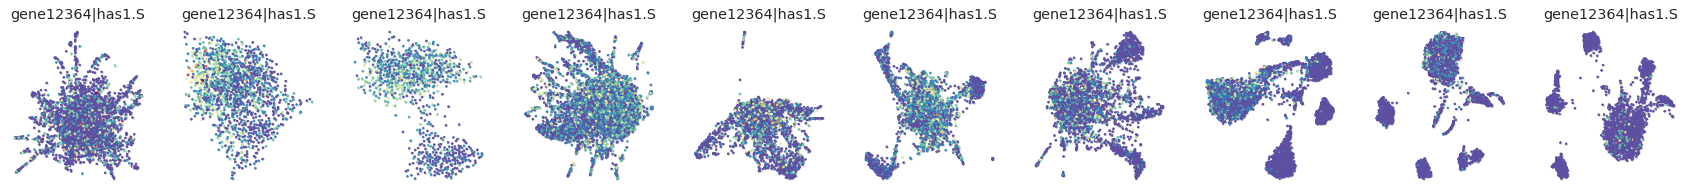

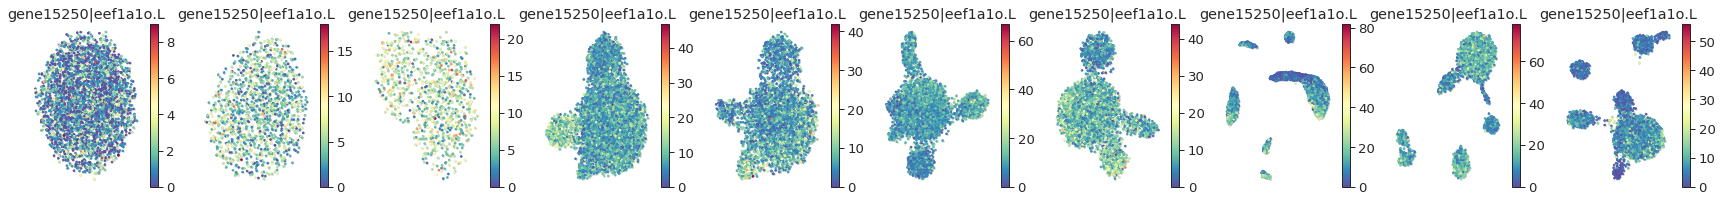

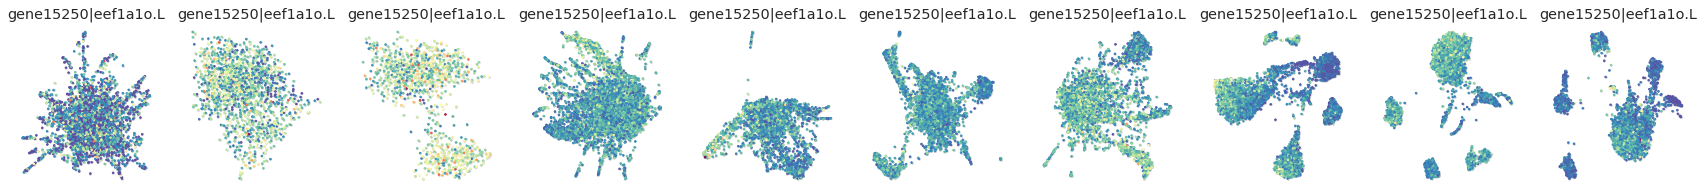

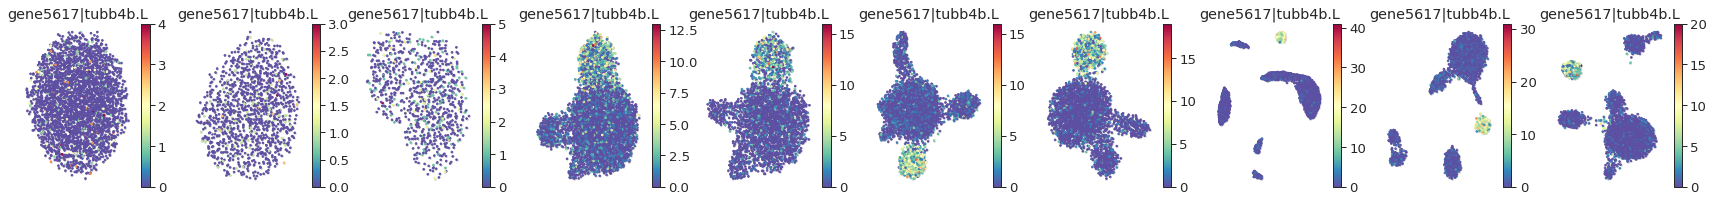

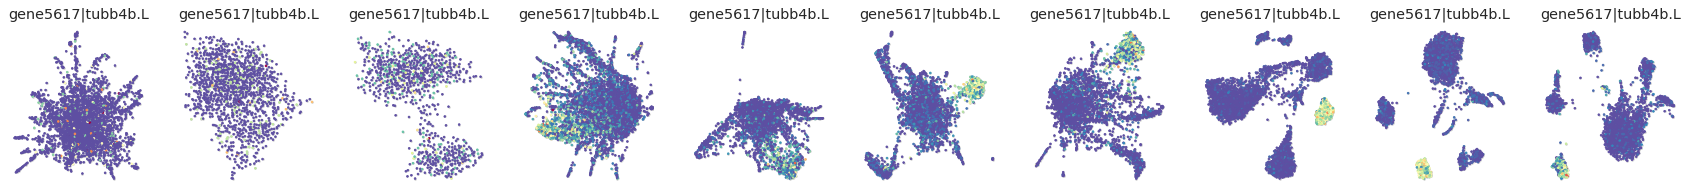

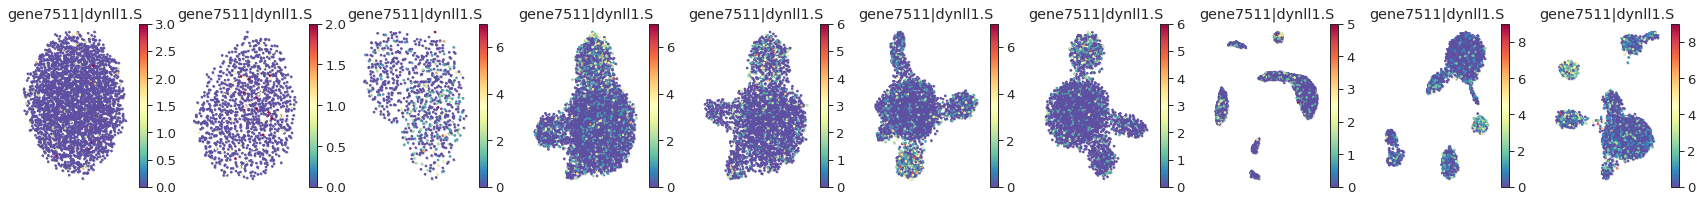

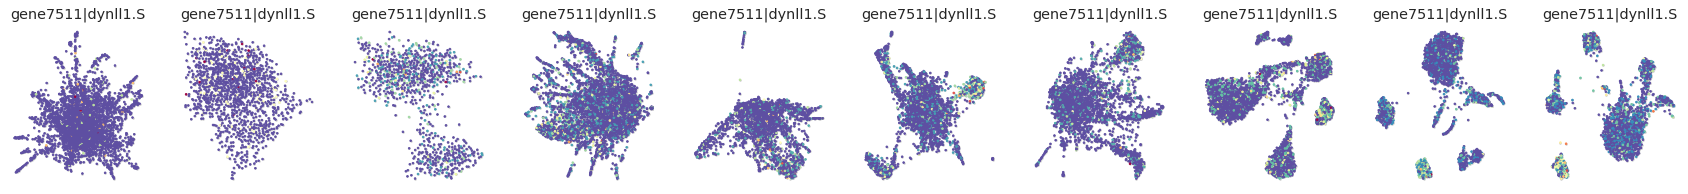

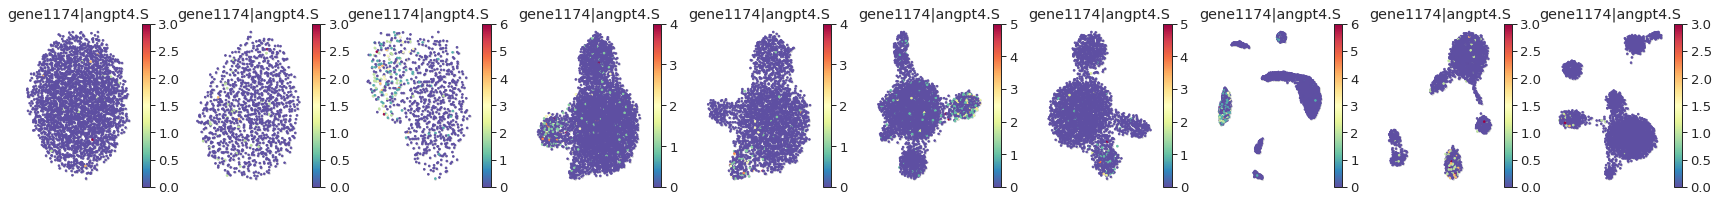

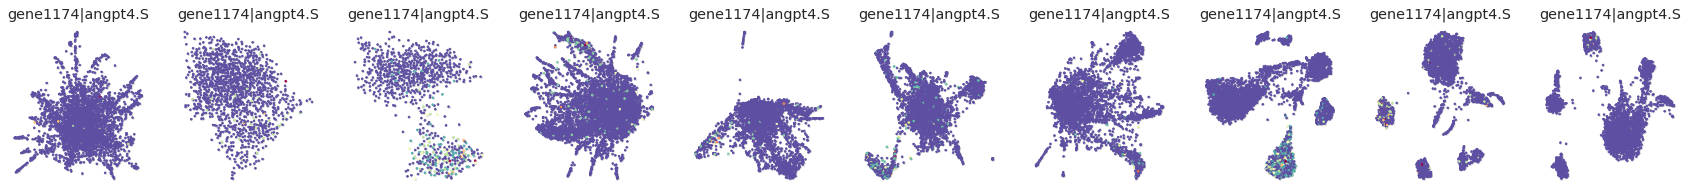

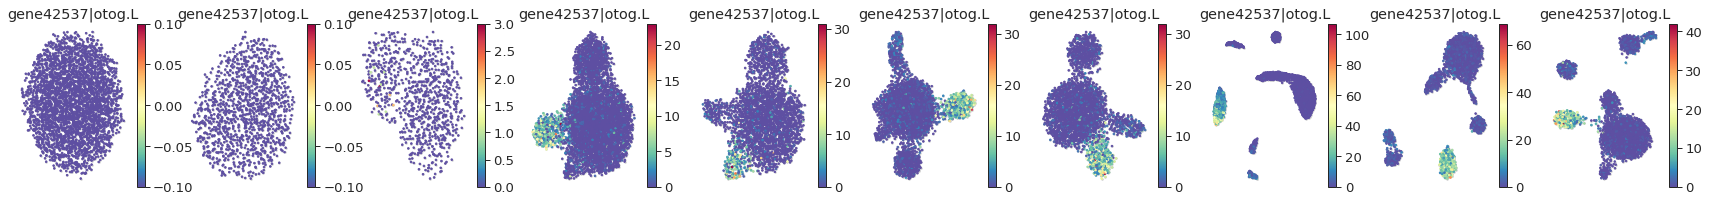

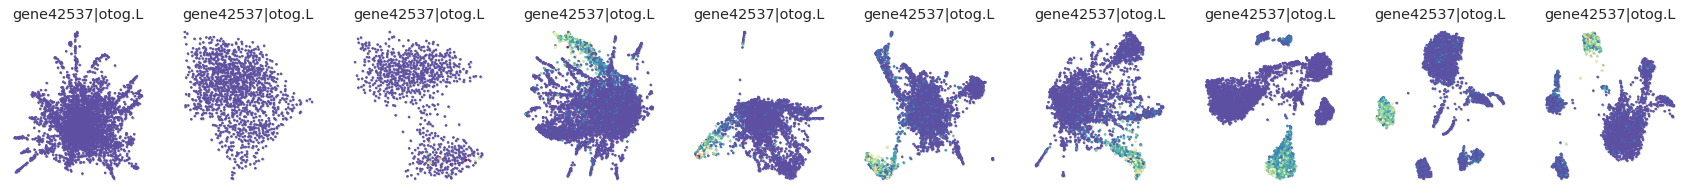

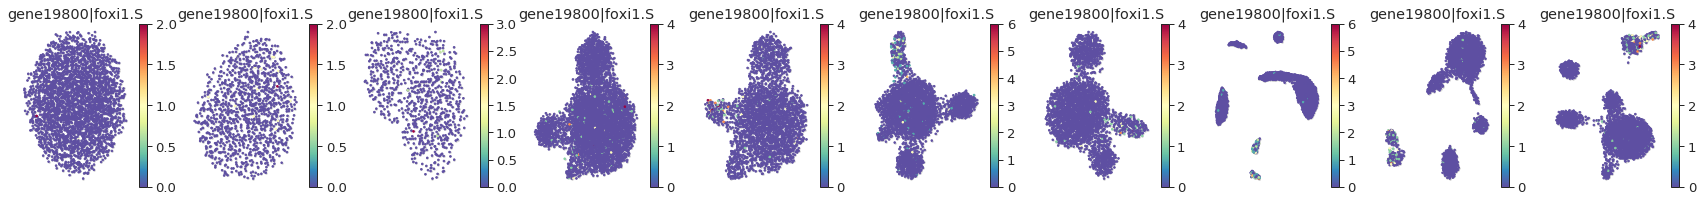

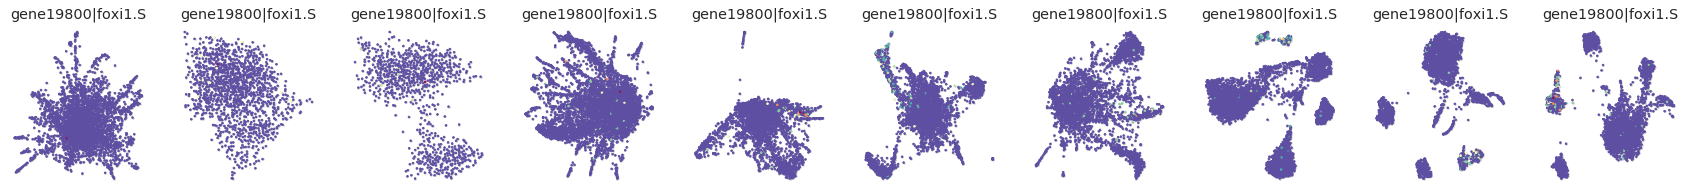

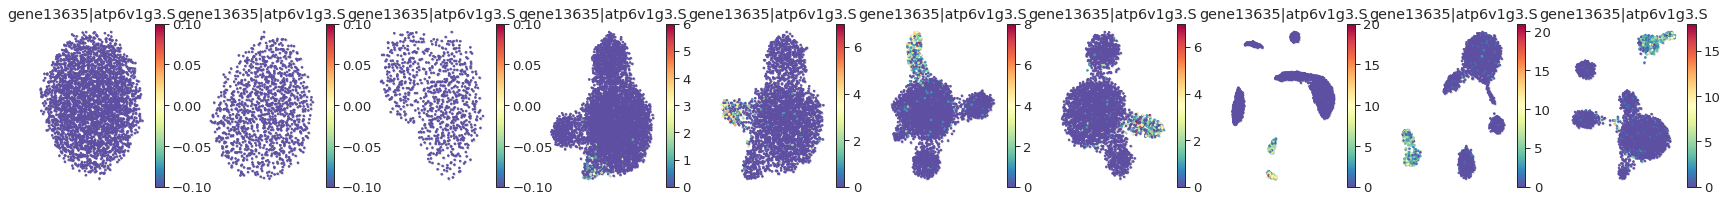

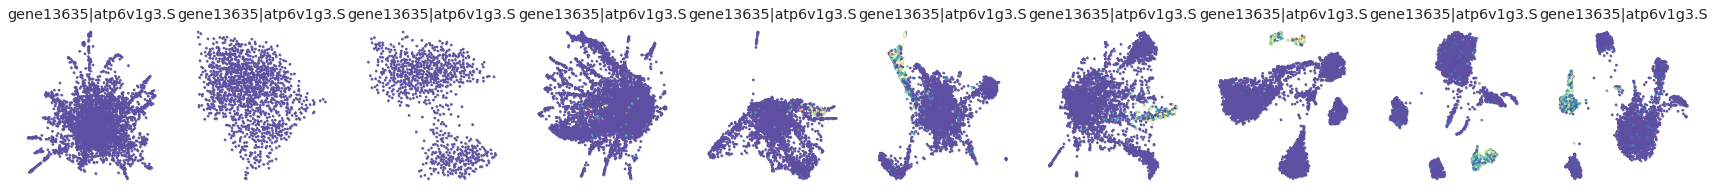

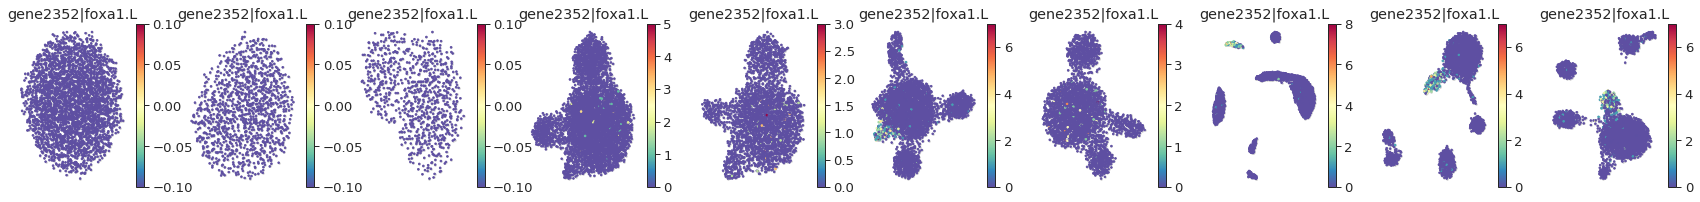

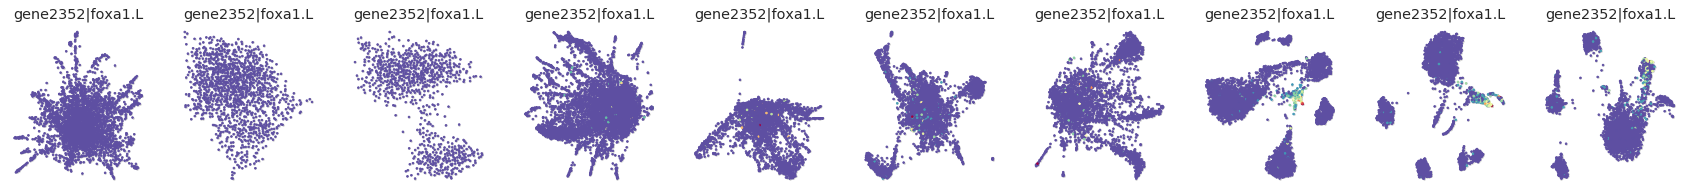

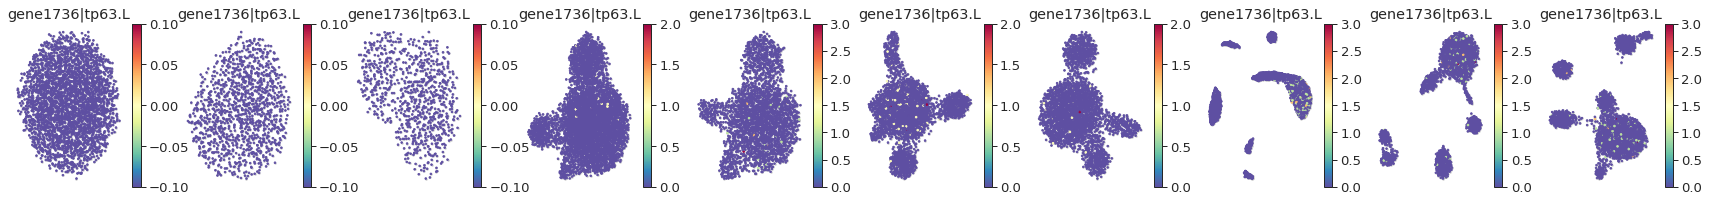

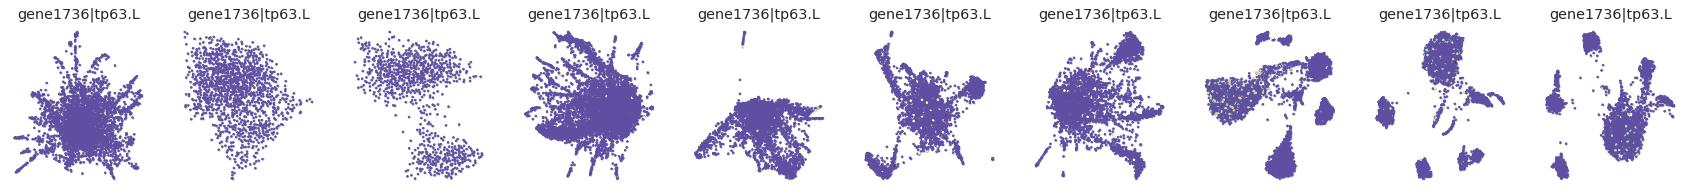

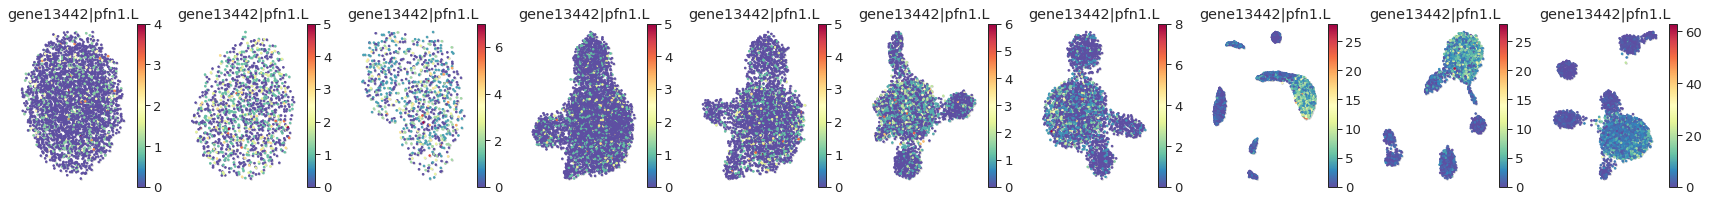

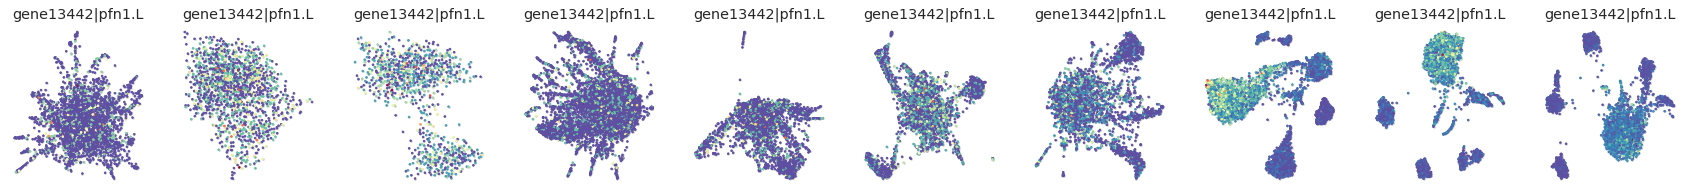

In [19]:
genes = ['gene18167|hist1h2aa.L', 'gene94|pou5f3.2.L', 'gene13271|sox3.S',
         'gene12364|has1.S','gene15250|eef1a1o.L',
         'gene5617|tubb4b.L','gene7511|dynll1.S',
         'gene1174|angpt4.S', 'gene42537|otog.L', 
         'gene19800|foxi1.S', 'gene13635|atp6v1g3.S', 
         'gene2352|foxa1.L',
         'gene1736|tp63.L', 'gene13442|pfn1.L'
                               ]
for g in genes:

    plot_gene_expression_umap(adatas, counts, stages, g, plot_scale = True)
    plt.savefig('/work/Xenopus/Notebooks/V3/intermediate_files/Figures/Ind_stage_umap_{}_Scale.pdf'.format(g),dpi = 500 )
    plot_gene_expression(adatas, counts, stages, g, plot_scale = False)
    plt.savefig('/work/Xenopus/Notebooks/V3/intermediate_files/Figures/Ind_stage_umap_{}_NoScale.pdf'.format(g),dpi = 500 )